In [4]:
import refinitiv.data as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

list_companys = [
        'AAPL.O',
        'AMZN.O',
        'VOWG_p.DE',
        'MBGn.DE',
        'RHMG.DE'
    ]

import refinitiv.data as rd
rd.open_session()
df = rd.get_data(
    universe = list_companys,
    fields = [
        'TR.CSRReportingScope',
        'TR.ESGPeriodLastUpdateDate',
        'TR.TRESGScoreGrade',
        'TR.CarbonOffsetsCredits',
        'TR.CarbonIntensityperEnergyProduced',
        'TR.EnergyUseTotal',
        'TR.AnalyticCO2EquivalentEmissionsTotalYoY'
    ],
    parameters = {
        'SDate': '1984-01-01',
        'EDate': '-1D',
    }
)

display(df)

,Instrument,ESG Reporting Scope,ESG Period Last Update Date,ESG Score Grade,Carbon Offsets/Credits,Carbon Intensity per Energy Produced,Energy Use Total,CO2 Equivalent Emissions Total YoY
0,AAPL.O,<NA>,NaT,,<NA>,,<NA>,<NA>
1,AAPL.O,<NA>,2022-08-11,B-,<NA>,,<NA>,<NA>
2,AAPL.O,<NA>,2022-08-10,C+,<NA>,,<NA>,<NA>
3,AAPL.O,<NA>,2022-08-10,C,<NA>,,956413.0,<NA>
4,AAPL.O,<NA>,2022-08-10,B-,<NA>,,1237350.0,<NA>
...,...,...,...,...,...,...,...,...
90,RHMG.DE,49.72,2022-08-10,C-,<NA>,,3750400.0,-55.2586
91,RHMG.DE,49.401,2022-09-30,C+,<NA>,,3732642.0,-4.22121
92,RHMG.DE,49.812,2022-09-30,B+,<NA>,,3539559.6,13.2247
93,RHMG.DE,50.0,2022-11-24,A-,<NA>,,<NA>,-11.6871


In [5]:
#ESG Score as Grade
list_NaN_Names = ["<NA>","NaT"]
#check if in list and replace with NaN
for i in df.columns:
    df[i] = df[i].apply(lambda x: np.nan if str(x) in list_NaN_Names else x)

In [6]:
df.dropna(subset=['ESG Score Grade'], inplace=True)
df.dropna(subset=['ESG Period Last Update Date'], inplace=True)

In [7]:
number_of_years = 30
end = datetime.datetime.now()
start = end - datetime.timedelta(days=number_of_years*365)
 
# Read the index into empty dataframe
df = rd.get_history(["AAPL.O", "AMZN.O", "VOWG_p.DE", "MBGn.DE", "RHMG.DE"],
                                start=start,
                                end=end,
                                fields = ["TR.PriceClose","TR.TRESGScore",'TR.EnergyUseTotal']
)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.dropna(inplace=True)
                                            

In [8]:
df.head()

AAPL.O                                  AMZN.O             \
           Price Close  ESG Score Energy Use Total Price Close  ESG Score   
Date                                                                        
1992-12-28    0.531249  51.746892         956413.0    0.097917  22.850896   
1992-12-29    0.532366  51.746892         956413.0    0.097917  22.850896   
1992-12-30    0.532366  51.746892         956413.0    0.097917  22.850896   
1992-12-30    0.532366  51.746892         956413.0    0.097917  22.850896   
1992-12-30    0.524553  51.746892         956413.0    0.097917  22.850896   

                              VOWG_p.DE                              \
           Energy Use Total Price Close  ESG Score Energy Use Total   
Date                                                                  
1992-12-28                    10.571285  50.635454         21060000   
1992-12-29                    10.571285  50.635454         21060000   
1992-12-30                    10.672932  50.635454         21060000   
1992-12-30                    10.672932  50.635454         21060000   
1992-12-30                    10.672932  50.635454         21060000   

               MBGn.DE                                 RHMG.DE             \
           Price Close  ESG Score Energy Use Total Price Close  ESG Score   
Date                                                                        
1992-12-28   22.635346  48.279939         74520000   10.225838  29.212015   
1992-12-29   22.535557  48.279939         74520000   10.225838  29.212015   
1992-12-30   22.410822  48.279939         74520000   10.225838  29.212015   
1992-12-30   22.410822  48.279939         74520000   10.225838  29.212015   
1992-12-30   22.410822  48.279939         74520000   10.225838  29.212015   

                             
           Energy Use Total  
Date                         
1992-12-28       13797900.0  
1992-12-29       13797900.0  
1992-12-30       13797900.0  
1992-12-30       13797900.0  
1992-12-30       13797900.0

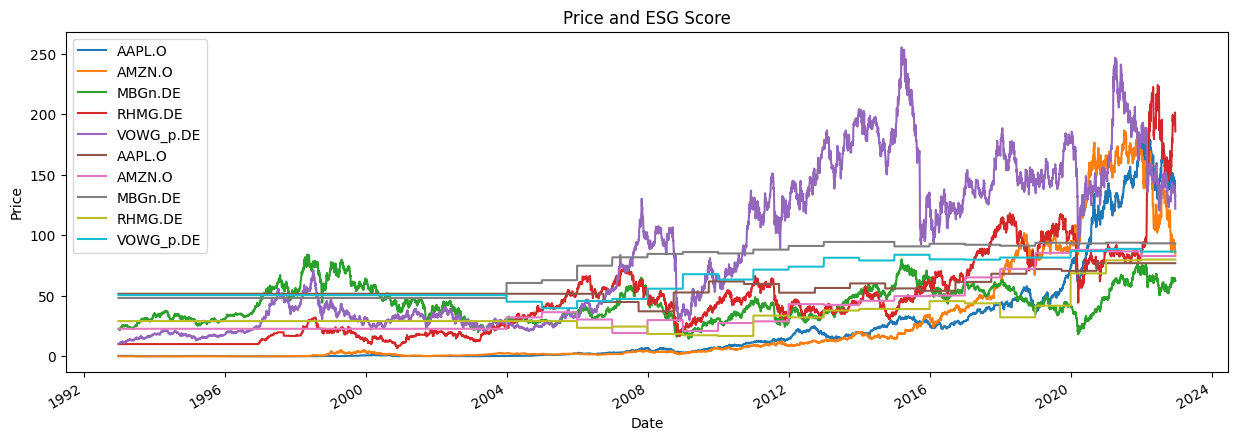

In [9]:
#make a plot of the ESG Score for 5 companies over the years
#make a line for each company
#use the date as index
#use seaborn to make the plot
#use the ESG Score as y value
# Make a line plot of the ESG Score for each company
# Use the date as the index and the ESG Score as the y value
#fill all NaN values with the previous value that is non NaN
#get the mean ESG Score for each company per year

#print the price and the ESG Score for each company
#make a plot of the ESG Score for 5 companies over the years

for company in df.columns.levels[0]:
    df[company]['Price Close'].plot(figsize=(15,5), label=company)
#plot the ESG Score for each company
for company in df.columns.levels[0]:
    df[company]['ESG Score'].plot(figsize=(15,5), label=company)
plt.title('Price and ESG Score')
plt.ylabel('Price')
    
plt.legend()
plt.show()


In [10]:
#correlation between the ESG Score and the Price
#make a dataframe that contains the ESG Score and the Price for all companies
df_corr = pd.DataFrame()
for company in df.columns.levels[0]:
    #append the ESG Score and the Price for each company to the dataframe
    df_corr = df_corr.append(df[company][['ESG Score','Price Close',"Energy Use Total"]])
#calculate the correlation between the ESG Score, the Price and the Energy Use Total
df_corr.reset_index(inplace=True)
df_corr.drop(columns=['Date'], inplace=True)
df_corr.dropna(inplace=True)
#remove all rows that contain values, that could not be converted to float
df_corr = df_corr[df_corr.applymap(np.isreal).all(1)]
df_corr = df_corr.astype(float)
#df_corr.corr()
#get partial correlation 
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import linregress
from scipy.stats import pearson3
import pingouin as pg

df_corr.pcorr()["Price Close"]



ESG Score           0.336749
Price Close         1.000000
Energy Use Total    0.438136
Name: Price Close, dtype: float64

In [14]:
from scipy.stats import spearmanr

# Extract the ESG score and prize columns from the dataframe
esg_scores = df_corr['ESG Score']
prizes = df_corr['Energy Use Total']

# Calculate the Spearman rank correlation coefficient
corr, p_value = spearmanr(esg_scores, prizes)

print(f'Correlation coefficient: {corr}')
print(f'p-value: {p_value}')


Correlation coefficient: 0.23721082321746936
p-value: 0.0


In [13]:
import subprocess

# Get a list of all the transformers models that are installed
installed_models = subprocess.run(
    ["pip", "freeze"], capture_output=True
).stdout.decode().split("\n")

# Filter the list to only include transformers models
transformers_models = [
    model for model in installed_models if "transformers" in model
]

# Uninstall all the transformers models
for model in transformers_models:
    subprocess.run(["pip", "uninstall", "-y", model])


In [2]:
!pip install sparknlp

     |████████████████████████████████| 453 kB 449 kB/s eta 0:00:01


In [3]:
import geopy
geolocator = geopy.Nominatim(user_agent="GoogleV3")


ModuleNotFoundError: No module named 'geopy'

In [5]:
test = [1,2,3]
test[:10]

[1, 2, 3]

In [3]:
city=""
city_firstword = city.split(" ")[0]
